# E-commerce Data Analysis Project

## 🎯 Project Objectives

The goal of this project is to explore and analyze customer order data to extract meaningful business insights and build interactive dashboards. Specifically, the project aims to:

1. **Customer Behavior Analysis**  
   Understand who spends more, identify high-frequency buyers, assess age and gender trends, and evaluate the impact of shipping fees on customer purchasing behavior.

2. **Sales and Revenue Trend Tracking**  
   Analyze revenue and order trends over time (monthly, quarterly), identify seasonal peaks, track performance by region, product, and customer demographics.

3. **Product Performance Insights**  
   Evaluate which products are top performers based on revenue and quantity sold, assess delivery success rates, identify region-specific vs. universally popular products.

4. **Business KPI Monitoring**  
   Track key performance indicators such as average order value (AOV), order volume, units sold, shipping status completion rates, and customer repeat rate.

5. **Dashboard Development**  
   Create interactive and visually engaging dashboards in Power BI for stakeholder communication and ongoing business monitoring.

## Load Data

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv("../data/raw_orders.csv")
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [8]:
# Check for null values
# df.isnull().sum()

In [3]:
# Drop null values
df.dropna(inplace=True)
# Recheck shape
len(df)

810

In [4]:
# Type conversions
# Convert `Age` column to `int`
df["Age"] = df["Age"].astype(int)
# Total price to float
df["Total Price"] = df["Total Price"].astype(float)
# Order Date to date
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [18]:
# Confirm type conversion
# df.info()

## Initial EDA

Here, we would do a very basic exploration of the data, and create very simple and intuitive visualization. Advanced visualizations are performed in subsequent files. Refer to `notebooks/`, `../reports/`, and `../dashboard/` directories.

Text(0.5, 0, 'Ages')

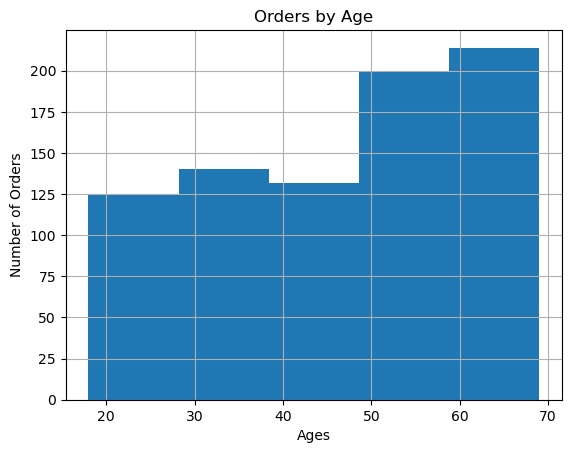

In [40]:
# Histogram of purchases broken down by age
df["Age"].hist(bins=5)
plt.title("Orders by Age")
plt.ylabel("Number of Orders")
plt.xlabel("Ages")
# plt.show()

Text(0.5, 0, 'Shipping Status')

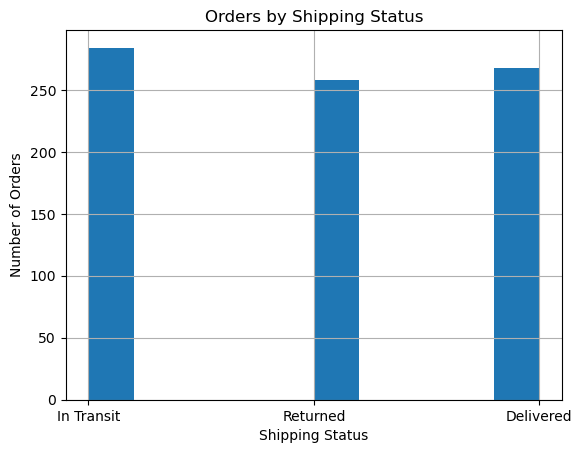

In [41]:
# Orders by categories
df["Shipping Status"].hist()
plt.title("Orders by Shipping Status")
plt.ylabel("Number of Orders")
plt.xlabel("Shipping Status")


Now, let's look a little deeper into what kinds of goods are still in transit

In [42]:
mask_transit = df["Shipping Status"] == "In Transit"

Text(0.5, 0, 'Product Category')

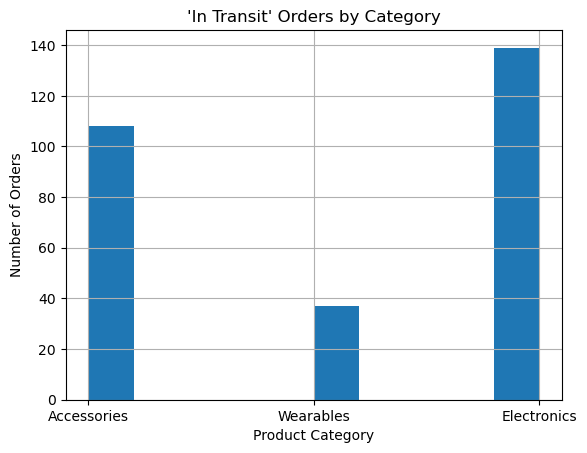

In [44]:
df_filtered = df[mask_transit]
df_filtered["Category"].hist()
plt.title("'In Transit' Orders by Category")
plt.ylabel("Number of Orders")
plt.xlabel("Product Category")

It appears that **Electronics** are typically in transit more than any other category of goods.
More visualization and in-depth analysis would be done in separate files.

## Feature Engineering

We would proceed to engineer features that would allow a more thorough analysis of the data.

In [5]:
# Date and time feature engineering
# Create year, month, and quarter, week
df["Order Year"] = df["Order Date"].dt.year
df["Order Month"] = df["Order Date"].dt.month
df["Order Quarter"] = df["Order Date"].dt.quarter
df["Order Day of Week"] = df["Order Date"].dt.day_of_week # 0 for Sunday, 6 for Saturday
df["Order Week"] = df["Order Date"].dt.isocalendar().week


In [53]:
# Create age bins
age_bracket_labels = ["Young Adults", "Adults", "Mid-Age", "Older Adults","Seniors", "Retired"]
age_brackets = [17, 25, 35, 45, 55, 65, 100]
df["Age Group"] = pd.cut(df["Age"], bins=age_brackets, labels=age_bracket_labels, right=True)

In [52]:
df.drop(columns="Age Group", inplace=True)

In [61]:
# Verify `Total Price` calculation
df["Total Price Calc"] = df["Unit Price"] * df ["Quantity"]
df["Total Price Check"] = df["Total Price"] == df["Total Price Calc"]

In [76]:
# Check the `Total Price Check`
mismatch = (df[df["Total Price Calc"] != df["Total Price"]])
# mismatch[["Unit Price", "Quantity", "Total Price", "Total Price Calc"]].head()

The original `Total Price` column has wrong calculation for about `2%`. As such it is replaced by the calculated `Total Price Calc` column

In [77]:
df.drop(columns=["Total Price","Total Price Check"], inplace=True)

Feature Engineering for high shipping fees and age group would be skipped for the time being.

## Saving Results

In [80]:
# Save cleaned dataframe as csv
df.to_csv("../data/cleaned_orders.csv", index=False)

## Summary of Cleaning Steps

**Cleaning Steps Carried Out**
1. Loading of data into dataframe
1. Type conversions for selected features
1. Dropping null values
1. Feature Engineering for Dates and Age brackets
1. Verifying the `Total Price` feature
1. Saving dataframe to csv file in `../data/` directory

## Notes

1. Removed all null values - leading to a loss of about 19% of the data
1. A new calculated field `Total Price Calc` replaced the `Total Price` due to inconsistent calculations of the latter from the original dataset.

## Usage Information

This notebook and the code therein is intended for educational purposes only.